In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
%matplotlib inline

# Load the data

In [62]:
# For the moment only data from 2005to 2009 available
crimes = pd.read_csv("data/crime_borough_2009_2014.csv")
print(crimes.shape)
crimes.head()

(198, 44)


,Borough,Year,Murder,Wounding/GBH,Assault With Injury,Common Assault,Offensive Weapon,Harassment,Other Violence,Violence Against The Person,...,Other Criminal Damage,Criminal Damage,Drug Trafficking,Possession Of Drugs,Other Drugs,Drugs,Going Equipped,Other Notifiable,Other Notifiable Offences,Total Notifiable Offences
0,Barking & Dagenham,2014,3,510,1173,1106,54,1137,217,4200,...,346,1647,87,1120,6,1213,11,292,303,16104
1,Barnet,2014,2,511,1110,1217,84,1424,209,4557,...,450,1965,103,1019,7,1129,24,298,322,22724
2,Bexley,2014,0,324,725,704,46,805,168,2772,...,300,1398,91,791,4,886,8,227,235,11837
3,Brent,2014,6,830,1546,1657,151,1819,401,6410,...,530,2047,149,3223,33,3405,15,443,458,24476
4,Bromley,2014,2,478,1221,1074,79,1392,181,4427,...,530,2047,78,1013,7,1098,14,259,273,19445


In [63]:
population = pd.read_csv("data/population_estimates_borough_2005_2014.csv")
print(population.shape)
population.head()

(330, 5)


,Borough,PERSONS,MALES,FEMALES,Year
0,City of London,7131,3869,3262,2005
1,Barking & Dagenham,166275,80029,86246,2005
2,Barnet,327541,157292,170249,2005
3,Bexley,222391,107014,115377,2005
4,Brent,270939,135296,135643,2005


In [64]:
# Load carbon emissions dataset
co2 = pd.read_csv("data/carbon_emissions_borough_2005_2014.csv")
print(co2.shape)
co2.head()

(330, 8)


,Borough,Year,Industry & Commercial,Domestic,Transport,N. LULUCF Net Emissions,Grand Total,Per Capita Emissions (t)
0,City of London,2005,1546.4,20.3,65.3,0.1,1632.1,228.9
1,Barking & Dagenham,2005,396.2,345.9,188.3,0.8,931.2,5.6
2,Barnet,2005,460.5,868.1,432.5,2.9,1764.0,5.4
3,Bexley,2005,485.1,531.0,266.8,2.1,1285.0,5.8
4,Brent,2005,543.0,616.5,267.4,1.2,1428.0,5.3


## Merge datasets into one by borough

In [65]:
df = crimes.merge(population, on=["Borough", "Year"]).merge(co2, on=["Borough", "Year"])
print(df.shape)
df.head()

(190, 53)


,Borough,Year,Murder,Wounding/GBH,Assault With Injury,Common Assault,Offensive Weapon,Harassment,Other Violence,Violence Against The Person,...,Total Notifiable Offences,PERSONS,MALES,FEMALES,Industry & Commercial,Domestic,Transport,N. LULUCF Net Emissions,Grand Total,Per Capita Emissions (t)
0,Barking & Dagenham,2014,3,510,1173,1106,54,1137,217,4200,...,16104,198294,96919,101375,229.9,242.9,170.5,0.4,643.8,3.2
1,Barnet,2014,2,511,1110,1217,84,1424,209,4557,...,22724,374915,184057,190858,371.9,645.8,395.9,1.5,1415.1,3.8
2,Bexley,2014,0,324,725,704,46,805,168,2772,...,11837,239865,115573,124292,378.4,379.4,215.8,1.0,974.6,4.1
3,Brent,2014,6,830,1546,1657,151,1819,401,6410,...,24476,320762,162432,158330,500.9,450.1,223.5,0.6,1175.1,3.7
4,Bromley,2014,2,478,1221,1074,79,1392,181,4427,...,19445,321278,154388,166890,274.2,597.1,307.3,1.1,1179.8,3.7


## Normalize crimes per 100k citizens

In [66]:
df.update(df.iloc[:,2:44].div(df["PERSONS"], axis=0).apply(lambda x: x*1e5))
print(df.shape)
df.head()

(190, 53)


,Borough,Year,Murder,Wounding/GBH,Assault With Injury,Common Assault,Offensive Weapon,Harassment,Other Violence,Violence Against The Person,...,Total Notifiable Offences,PERSONS,MALES,FEMALES,Industry & Commercial,Domestic,Transport,N. LULUCF Net Emissions,Grand Total,Per Capita Emissions (t)
0,Barking & Dagenham,2014,1.512905,257.193864,591.545886,557.757673,27.232291,573.391025,109.433467,2118.067112,...,8121.274471,198294,96919,101375,229.9,242.9,170.5,0.4,643.8,3.2
1,Barnet,2014,0.533454,136.297561,296.067109,324.606911,22.405078,379.819426,55.745969,1215.475508,...,6061.107184,374915,184057,190858,371.9,645.8,395.9,1.5,1415.1,3.8
2,Bexley,2014,0.000000,135.075980,302.253351,293.498426,19.177454,335.605445,70.039397,1155.650053,...,4934.859192,239865,115573,124292,378.4,379.4,215.8,1.0,974.6,4.1
3,Brent,2014,1.870546,258.758831,481.977292,516.582388,47.075402,567.087124,125.014808,1998.366390,...,7630.579682,320762,162432,158330,500.9,450.1,223.5,0.6,1175.1,3.7
4,Bromley,2014,0.622514,148.780807,380.044696,334.289930,24.589296,433.269629,56.337502,1377.934375,...,6052.390764,321278,154388,166890,274.2,597.1,307.3,1.1,1179.8,3.7


In [67]:
# Sort by total notifiable offences
df = df.sort_values("Total Notifiable Offences", ascending=False)

## Missing values

In [68]:
print(df.columns[df.isnull().any()])
df[df.isnull().any(axis=1)]

Index([], dtype='object')


,Borough,Year,Murder,Wounding/GBH,Assault With Injury,Common Assault,Offensive Weapon,Harassment,Other Violence,Violence Against The Person,...,Total Notifiable Offences,PERSONS,MALES,FEMALES,Industry & Commercial,Domestic,Transport,N. LULUCF Net Emissions,Grand Total,Per Capita Emissions (t)


# Visualization

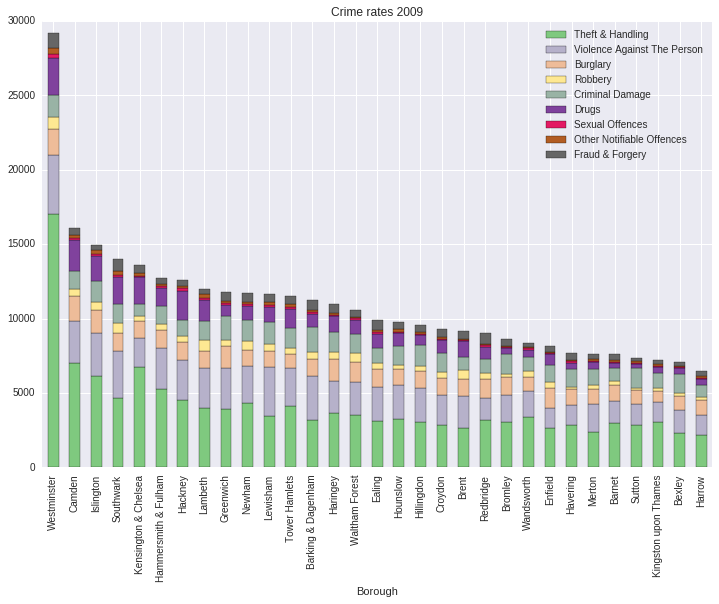

In [77]:
# Take data of year 2009
df2009 = df[df["Year"]==2009]
df2009 = df2009.sort_values("Total Notifiable Offences", ascending=False)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Crime rates 2009")
df2009[["Borough", "Theft & Handling", "Violence Against The Person",
    "Burglary", "Robbery", "Criminal Damage", "Drugs","Sexual Offences",
    "Other Notifiable Offences", "Fraud & Forgery"]].plot(ax=ax, x="Borough", kind='bar', stacked=True,
                                                          colormap="Accent")

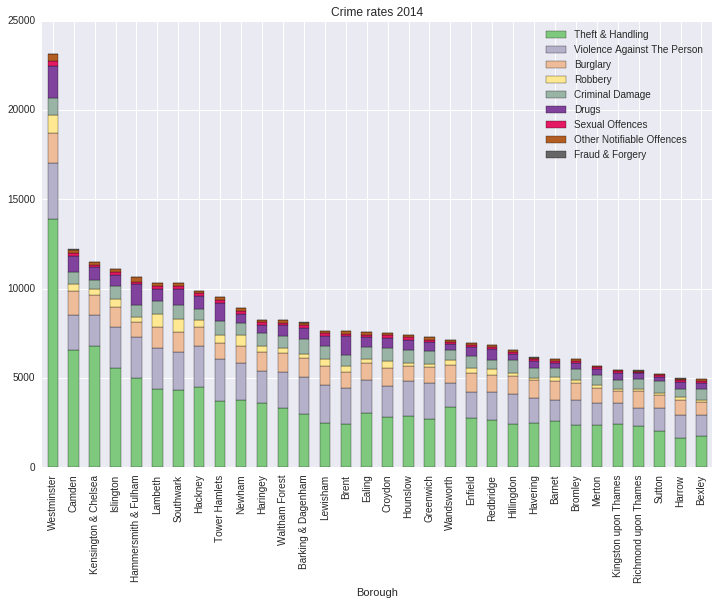

In [70]:
# Take data of year 2014
df2014 = df[df["Year"]==2014]
df2014 = df2014.sort_values("Total Notifiable Offences", ascending=False)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Crime rates 2014")
df2014[["Borough", "Theft & Handling", "Violence Against The Person",
    "Burglary", "Robbery", "Criminal Damage", "Drugs","Sexual Offences",
    "Other Notifiable Offences", "Fraud & Forgery"]].plot(ax=ax, x="Borough", kind='bar', stacked=True,
                                                          colormap="Accent")

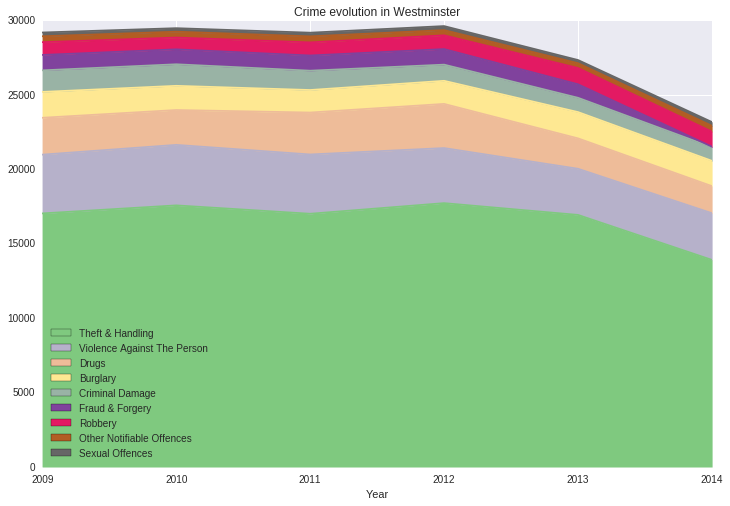

In [71]:
# Take crime in Westminster - most criminal borough
dfWestminster = df[df["Borough"]=="Westminster"]
dfWestminster = dfWestminster.sort_values("Year")

f, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Crime evolution in Westminster")
dfWestminster[["Year", "Theft & Handling", "Violence Against The Person",
               "Drugs", "Burglary", "Criminal Damage", "Fraud & Forgery", "Robbery",
               "Other Notifiable Offences", "Sexual Offences"]].plot(ax=ax, x="Year", kind="area",
                                                                     colormap="Accent")
ax.set_xticklabels(dfWestminster.Year)

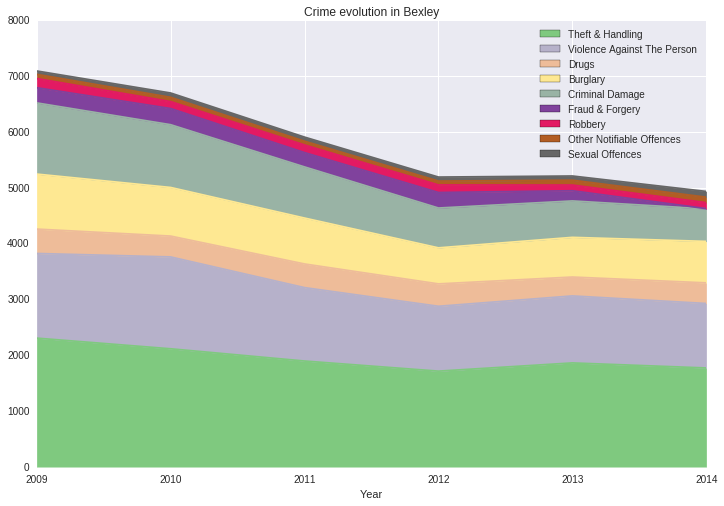

In [72]:
# Take crime in Bexley - less criminal borough
dfBexley = df[df["Borough"]=="Bexley"]
dfBexley = dfBexley.sort_values("Year")

f, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Crime evolution in Bexley")
dfBexley[["Year", "Theft & Handling", "Violence Against The Person",
               "Drugs", "Burglary", "Criminal Damage", "Fraud & Forgery", "Robbery",
               "Other Notifiable Offences", "Sexual Offences"]].plot(ax=ax, x="Year", kind="area",
                                                                     colormap="Accent")
ax.set_xticklabels(dfBexley.Year)

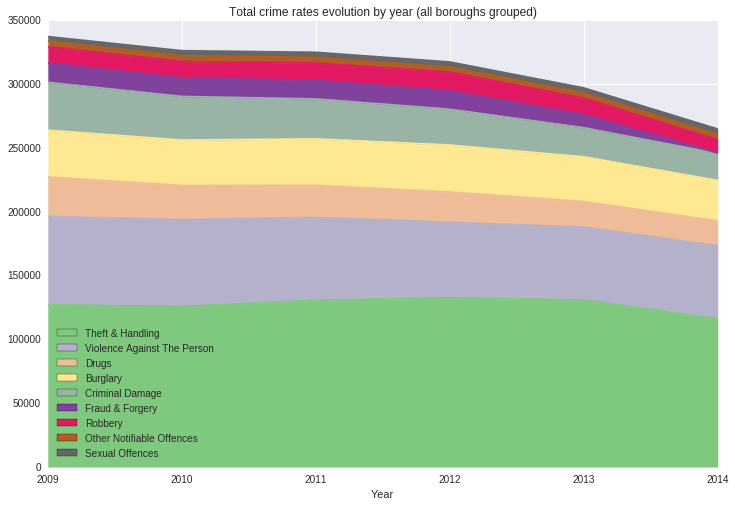

In [73]:
# Type of crime evolution by year
dfByYear = df.groupby(['Year'], as_index=False).sum()
dfByYear = dfByYear.sort_values("Year")

f, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Total crime rates evolution by year (all boroughs grouped)")
dfByYear[["Year", "Theft & Handling", "Violence Against The Person",
               "Drugs", "Burglary", "Criminal Damage", "Fraud & Forgery", "Robbery",
               "Other Notifiable Offences", "Sexual Offences"]].plot(ax=ax, x="Year", kind="area",
                                                                     colormap="Accent")
ax.set_xticklabels(dfByYear.Year)

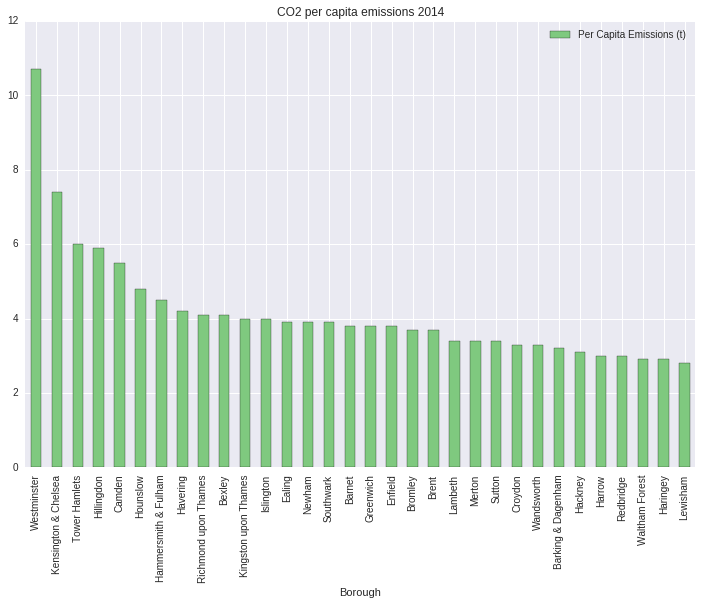

In [74]:
# Take data of year 2014
df2014 = df2014.sort_values("Per Capita Emissions (t)", ascending=False)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))
ax.set_title("CO2 per capita emissions 2014")
df2014[["Borough", "Per Capita Emissions (t)"]].plot(ax=ax, x="Borough", kind='bar',
                                                          colormap="Accent")

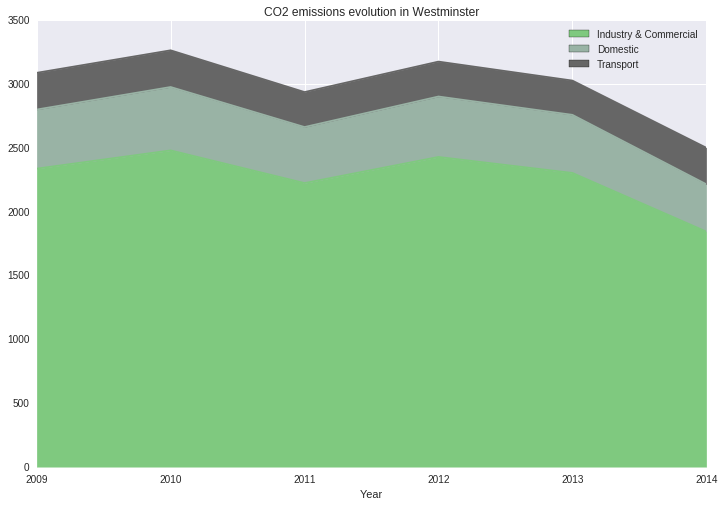

In [75]:
# Take CO2 emissions in Westminster - most criminal borough
f, ax = plt.subplots(figsize=(12, 8))
ax.set_title("CO2 emissions evolution in Westminster")
dfWestminster[["Year", "Industry & Commercial", "Domestic", "Transport"]].plot(ax=ax, x="Year", kind="area",
                                                                     colormap="Accent")
ax.set_xticklabels(dfWestminster.Year)

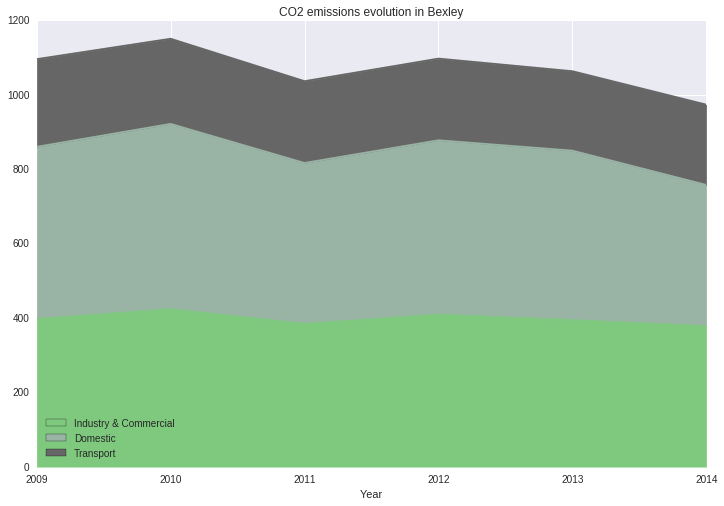

In [79]:
# Take CO2 emissions in Bexley - less criminal borough
f, ax = plt.subplots(figsize=(12, 8))
ax.set_title("CO2 emissions evolution in Bexley")
dfBexley[["Year", "Industry & Commercial", "Domestic", "Transport"]].plot(ax=ax, x="Year", kind="area",
                                                                     colormap="Accent")
ax.set_xticklabels(dfBexley.Year)